In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, ConfusionMatrixDisplay

In [3]:
weekly_df = pd.read_csv(r"data\weekly.csv")
weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [4]:
weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [19]:
weekly_df["Direction"] = weekly_df["Direction"].map({"Down": 0, "Up": 1})

# Data Exploration

In [5]:
weekly_df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


[Text(0, 0, '484'), Text(0, 0, '605')]

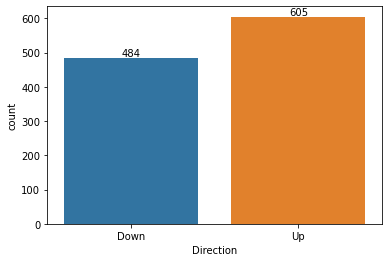

In [6]:
# Data seems to be relatively balanced

ax = sns.countplot(x='Direction', data=weekly_df)
ax.bar_label(ax.containers[0])

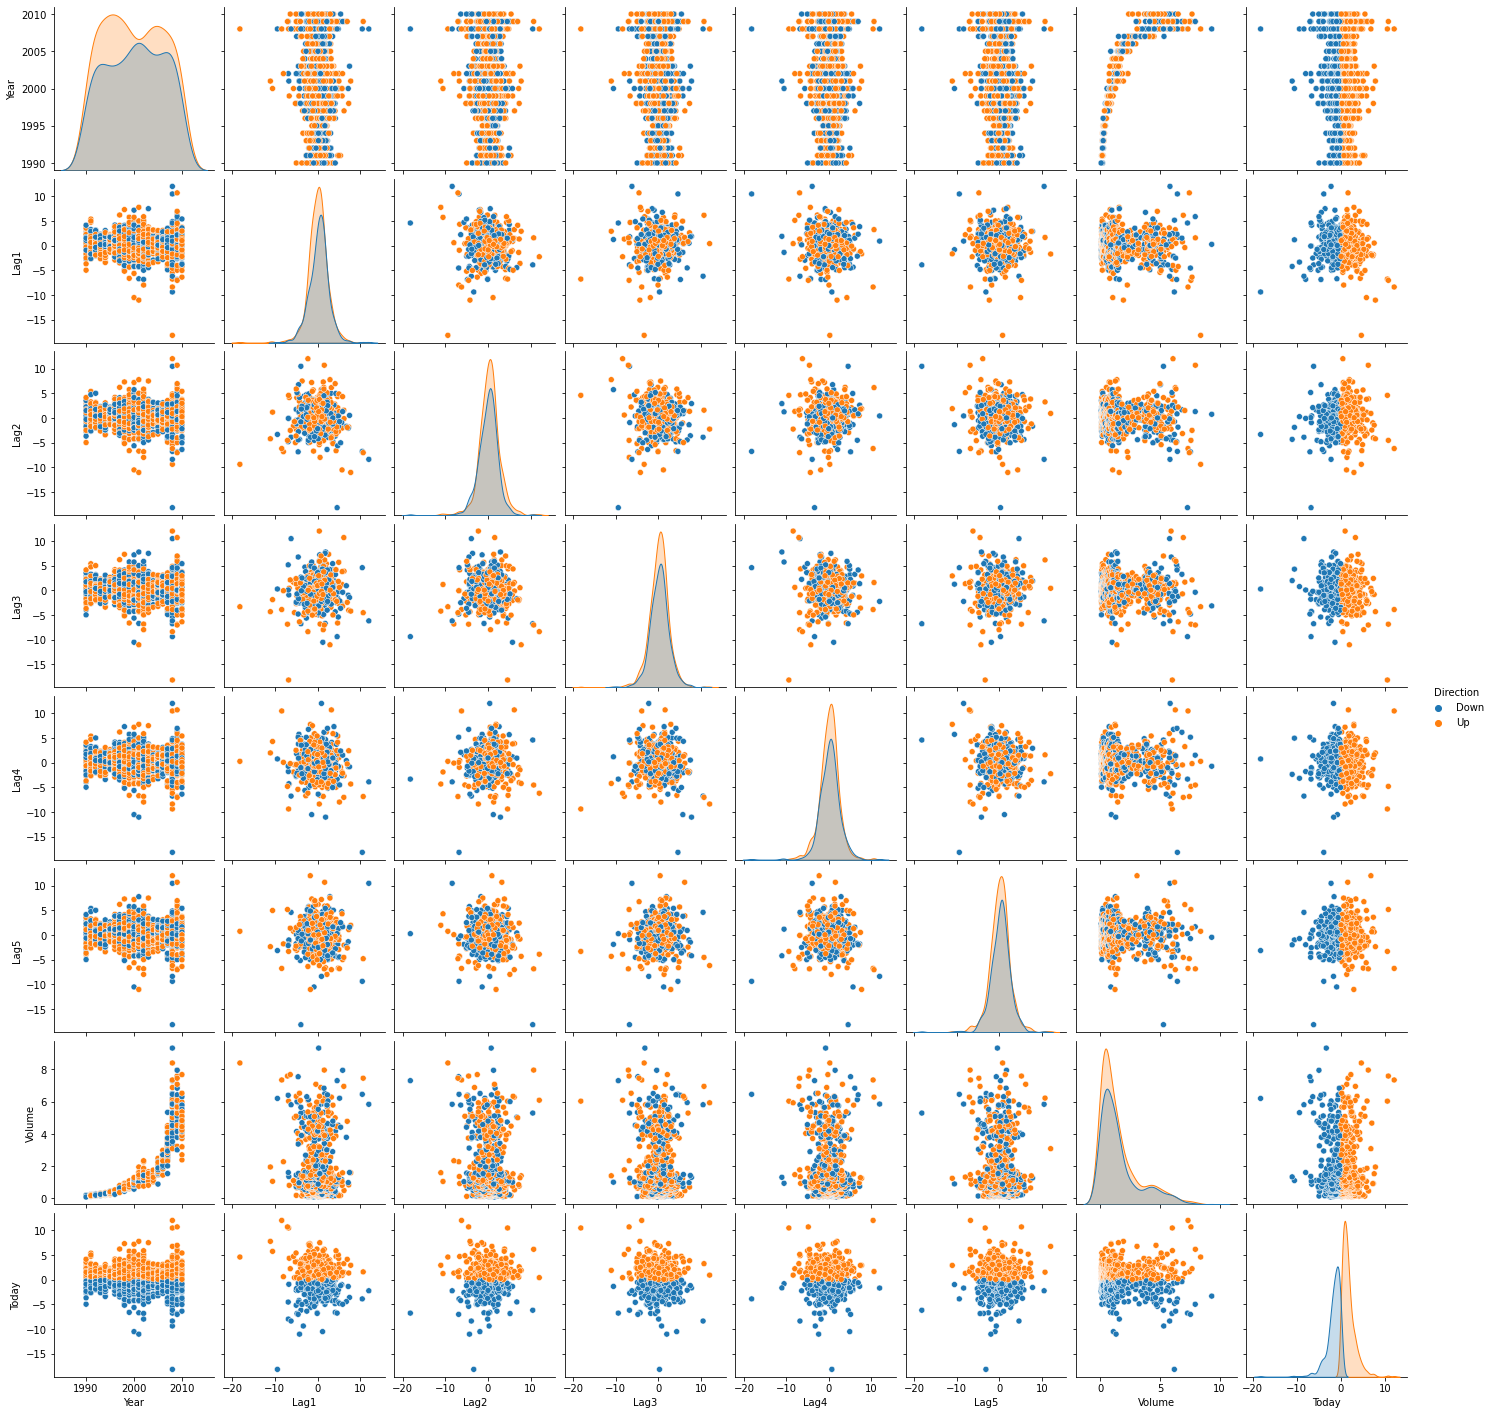

In [7]:
sns.pairplot(weekly_df, hue="Direction")

### When I visualized the data, I used Direction as the label and generated a pairplot for all the other columns as if they were the predictors. Although it doesn't make sense to use it as a predictor, I was curious what will happen if I use "Today" column as a predictor, because it is essentialy captures all information needed to predict whether the direction is up or down. If "Today" is positive, then direction is up whereas if it is negative, then direction is down. I tried fitting a logistic regression model using Today as predictor; however, the model was throwing an error "perfect separation detected", but using Naive Bayes gives almost perfect results which was a bit confusing for me. After searching for the problem for a bit, I realized that what is happening is called the perfect separation problem, when the target is a perfect linear combination of the predictor. This prevents MLE from converging. First time for me to encounter this problem, so I am leaving this here for future reference.

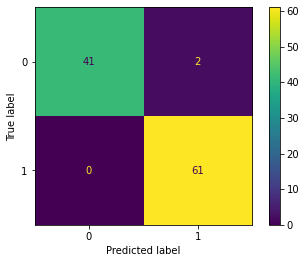

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

train = weekly_df[weekly_df['Year'] <= 2008]
test = weekly_df[weekly_df['Year'] > 2008]

gnb.fit(train["Today"].values.reshape(-1,1), train["Direction"])

gnb_pred = gnb.predict(test["Today"].values.reshape(-1,1))

conf_mat = confusion_matrix(test["Direction"], gnb_pred)
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()

plt.show()

In [22]:
train

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
980,2008,12.026,-8.389,-6.198,-3.898,10.491,5.841565,-2.251,0
981,2008,-2.251,12.026,-8.389,-6.198,-3.898,6.093950,0.418,1
982,2008,0.418,-2.251,12.026,-8.389,-6.198,5.932454,0.926,1
983,2008,0.926,0.418,-2.251,12.026,-8.389,5.855972,-1.698,0


In [26]:
# Will throw error if I try to fit logistic regression model.

# log_model = sm.Logit(train["Direction"], sm.add_constant(train["Today"])).fit()

## Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

Only Lag2 seems to be statistically significant.

In [27]:
import statsmodels.api as sm
  
train_cols = weekly_df.columns.difference(["Direction", "Today", "Year"])
test_col = ["Direction"]

X_train = sm.add_constant(weekly_df[train_cols])
y_train = weekly_df[test_col]

log_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


In [28]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 Jun 2022   Pseudo R-squ.:                0.006580
Time:                        20:58:38   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [29]:
y_pred = log_model.predict(X_train)
y_pred = np.round(y_pred)

## Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_clf(clf, X_test, y_test, round=False):
    y_pred = clf.predict(X_test)
    if(round):
        y_pred = np.round(y_pred)
        
    print(classification_report(y_test, y_pred, digits=3))
    
    conf_mat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_mat)
    disp.plot()
    plt.show()

              precision    recall  f1-score   support

           0      0.529     0.112     0.184       484
           1      0.564     0.921     0.700       605

    accuracy                          0.561      1089
   macro avg      0.547     0.516     0.442      1089
weighted avg      0.549     0.561     0.471      1089



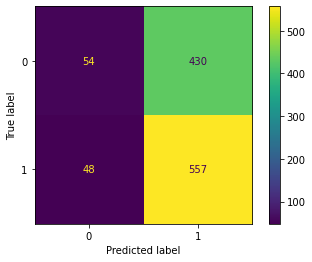

In [32]:
evaluate_clf(log_model, X_train, y_train, round=True)

# Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [33]:
weekly_train = weekly_df[weekly_df["Year"].between(1990, 2008)]
weekly_test = weekly_df[~weekly_df["Year"].between(1990, 2008)]

train_cols = ["Lag2"]
test_col = ["Direction"]

X_train = sm.add_constant(weekly_train[train_cols])
y_train = weekly_train[test_col]

log_model = sm.Logit(y_train, X_train).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


C:\Users\amrsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 Jun 2022   Pseudo R-squ.:                0.003076
Time:                        21:00:38   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

              precision    recall  f1-score   support

           0      0.643     0.209     0.316        43
           1      0.622     0.918     0.742        61

    accuracy                          0.625       104
   macro avg      0.633     0.564     0.529       104
weighted avg      0.631     0.625     0.566       104



C:\Users\amrsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


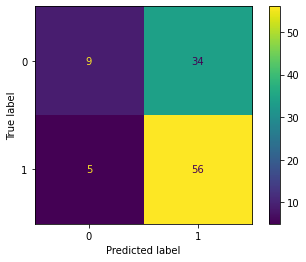

In [36]:
X_test, y_test = sm.add_constant(weekly_test[train_cols]), weekly_test[test_col]

evaluate_clf(log_model, X_test, y_test, round=True)

## When we visualize the distribution of Lag2, we can see that its roughly normally distributed in the two direction classes, with class 1 (up) almost always more likely. Therefore, a logistic regression model will always predict 1, unless the value of Lag2 is in the small range around -5 where class 0 (down) is more likely.

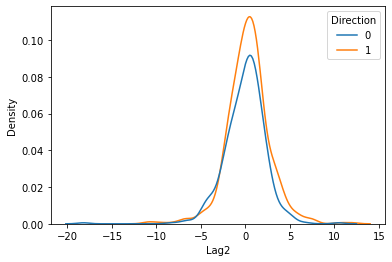

In [68]:
sns.kdeplot(x="Lag2", data = weekly_df, hue="Direction")
plt.show()

### To confirm the previous observation, lets print the values of Lag2 in all the samples that were predicted as 0. We can see that they all lie in the same range of values around -5.

In [67]:
X_test[y_pred==0]

,Lag2
987,-4.448
988,-4.518
992,-4.808
993,-6.868
994,-4.540
995,-7.035
1005,-4.988
1029,-4.021
1041,-3.897
1056,-6.388


# LDA

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

%matplotlib inline

In [46]:
X_train, y_train = weekly_train["Lag2"].values.reshape((-1, 1)), weekly_train["Direction"]
X_test, y_test = weekly_test["Lag2"].values.reshape((-1, 1)), weekly_test["Direction"]


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print(lda.priors_, lda.means_, lda.coef_)

[0.44771574 0.55228426] [[-0.03568254]
 [ 0.26036581]] [[0.05768451]]


              precision    recall  f1-score   support

           0      0.643     0.209     0.316        43
           1      0.622     0.918     0.742        61

    accuracy                          0.625       104
   macro avg      0.633     0.564     0.529       104
weighted avg      0.631     0.625     0.566       104



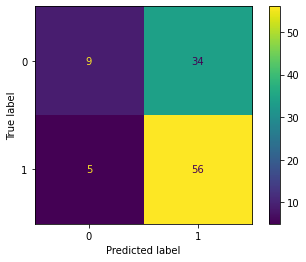

In [48]:
lda_pred = lda.predict(X_test)
evaluate_clf(lda, X_test, y_test)

# QDA

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        43
           1      0.587     1.000     0.739        61

    accuracy                          0.587       104
   macro avg      0.293     0.500     0.370       104
weighted avg      0.344     0.587     0.434       104



C:\Users\amrsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amrsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amrsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


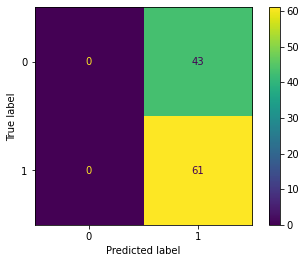

In [49]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train.values.ravel())

evaluate_clf(qda, X_test, y_test)

# KNN

              precision    recall  f1-score   support

           0      0.423     0.512     0.463        43
           1      0.596     0.508     0.549        61

    accuracy                          0.510       104
   macro avg      0.510     0.510     0.506       104
weighted avg      0.525     0.510     0.513       104



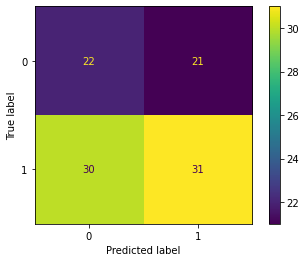

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.values.ravel())

evaluate_clf(knn, X_test, y_test)

# Naive Bayes

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        43
           1      0.587     1.000     0.739        61

    accuracy                          0.587       104
   macro avg      0.293     0.500     0.370       104
weighted avg      0.344     0.587     0.434       104



C:\Users\amrsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amrsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amrsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


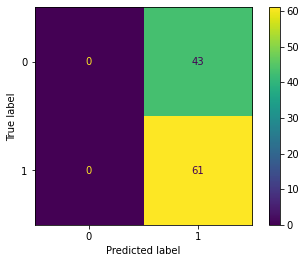

In [51]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

evaluate_clf(gnb, X_test, y_test)

# Which of these methods appears to provide the best results on this data?
The linear models Logistic regression and LDA are performing  the best on this dataset. 

# Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

To see which interaction terms may be helpful, I generated all possible 2-way interactions between predictors. Then, I plotted then with the response as label, and none of them seems to be able to add a discriminating value to the model because the amount of overlap between the two classes is very big.

In [52]:
from itertools import combinations

feature_cols = ["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]
label_col = ["Direction"]

interactions = [(x, y) for x, y in combinations(feature_cols, 2)]

weekly_interaction_df = weekly_df[feature_cols + label_col].copy()

for x, y in interactions:
    weekly_interaction_df[f"{x}*{y}"] = weekly_interaction_df[x] * weekly_interaction_df[y]
    
weekly_interaction_df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction,Lag1*Lag2,Lag1*Lag3,Lag1*Lag4,...,Lag2*Lag3,Lag2*Lag4,Lag2*Lag5,Lag2*Volume,Lag3*Lag4,Lag3*Lag5,Lag3*Volume,Lag4*Lag5,Lag4*Volume,Lag5*Volume
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976,0,1.282752,-3.211776,-0.186864,...,-6.187392,-0.359988,-5.476848,0.243622,0.901344,13.713024,-0.609986,0.797836,-0.035490,-0.539936
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574,0,-0.220320,-0.424440,1.062720,...,1.282752,-3.211776,-0.186864,0.121236,-6.187392,-0.359988,0.233558,0.901344,-0.584787,-0.034023
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837,1,0.695520,-2.102016,-4.049472,...,-0.220320,-0.424440,1.062720,-0.043156,1.282752,-3.211776,0.130427,-6.187392,0.251265,-0.629120
3,3.514,-2.576,-0.270,0.816,1.572,0.161630,1,-9.052064,-0.948780,2.867424,...,0.695520,-2.102016,-4.049472,-0.416359,-0.220320,-0.424440,-0.043640,1.282752,0.131890,0.254082
4,0.712,3.514,-2.576,-0.270,0.816,0.153728,1,2.501968,-1.834112,-0.192240,...,-9.052064,-0.948780,2.867424,0.540200,0.695520,-2.102016,-0.396003,-0.220320,-0.041507,0.125442


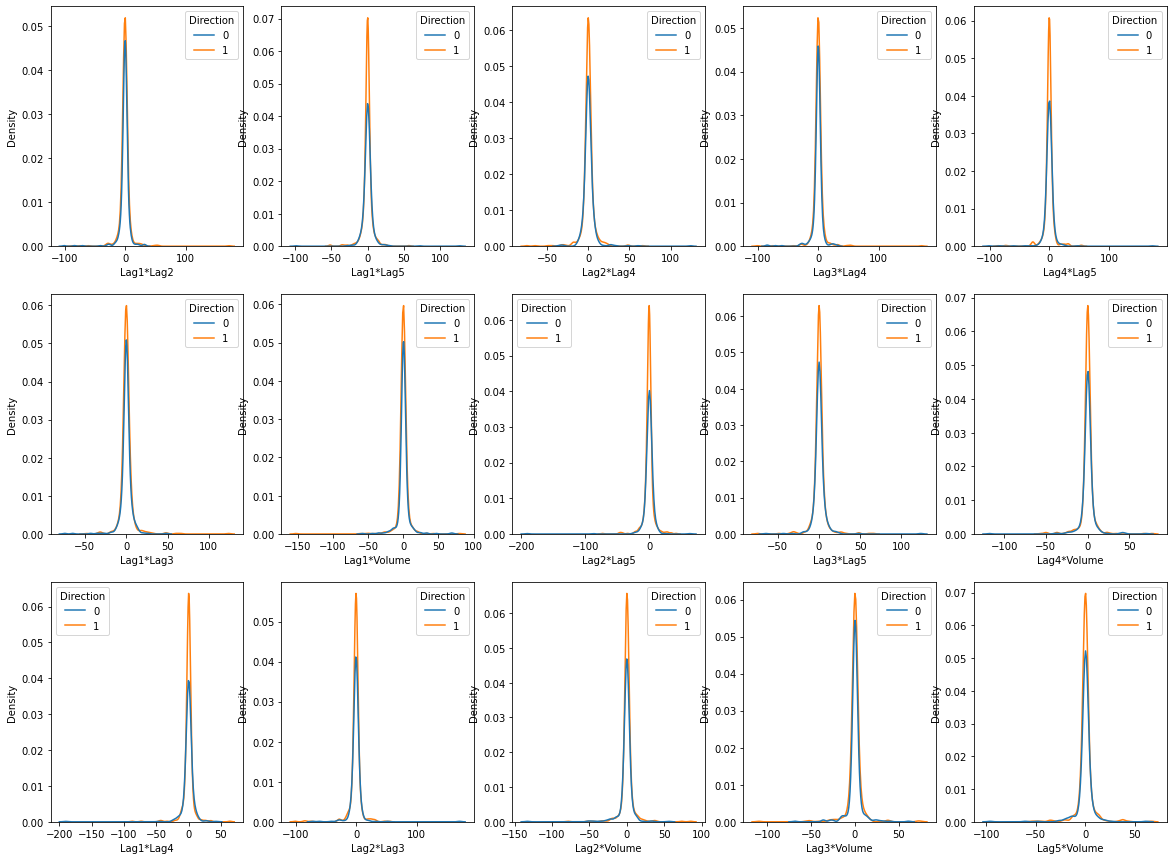

In [53]:
fig, ax = plt.subplots(3, 5, figsize=(20, 15))

for row in range(3):
    for col in range(5):
        colname = weekly_interaction_df.columns[7+3*col+row]
        sns.kdeplot(x=colname, hue="Direction", data=weekly_interaction_df, ax=ax[row, col])
        

# Auto Dataset

In [54]:
auto_df = pd.read_csv(r"data\\auto.csv")
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median.

In [55]:
auto_df["mpg01"] = (auto_df["mpg"] > auto_df["mpg"].median()).astype('int')
auto_df.drop(columns=["name", "mpg"], inplace=True)
auto_df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,0
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,0
4,8,302.0,140,3449,10.5,70,1,0


## Data Exploration

Cylinders, displacement, horsepower and weight seem to have a relationship with mpg from the plots.

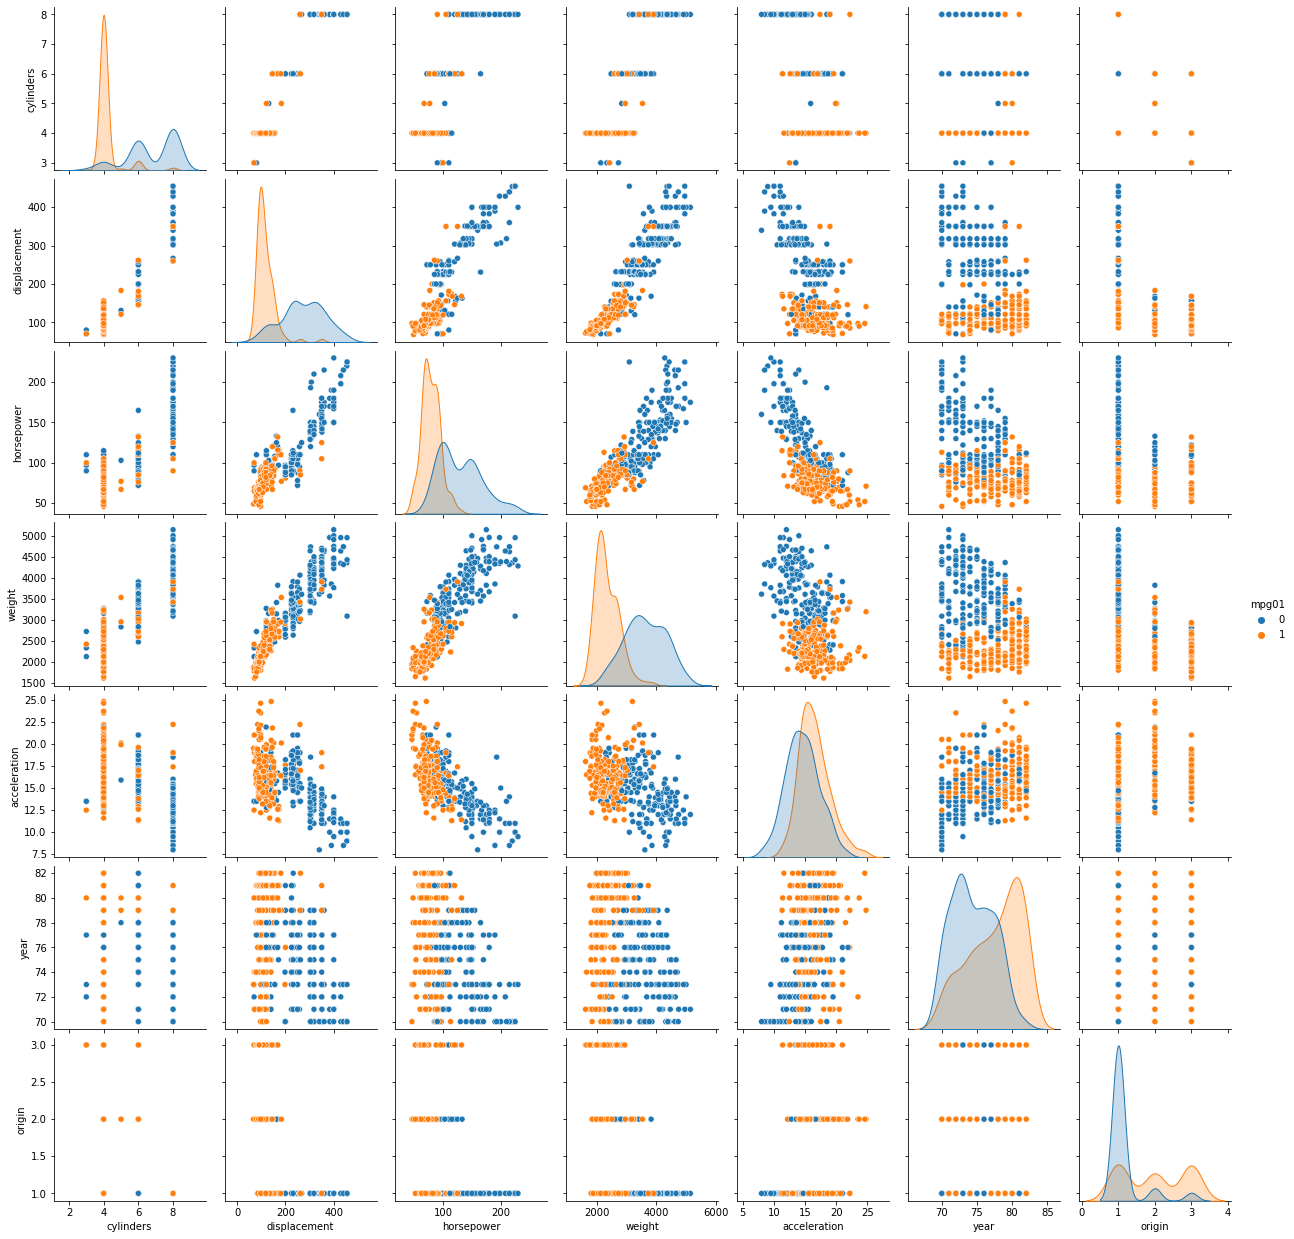

In [56]:
sns.pairplot(auto_df, hue="mpg01")

In [57]:
from sklearn.model_selection import train_test_split

X = auto_df.iloc[:, :-1]
y = auto_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

## LDA 

In [58]:
features = ["cylinders", "displacement", "horsepower", "weight"]

X_train_sub = X_train[features]
X_test_sub = X_test[features]

              precision    recall  f1-score   support

           0      0.920     0.885     0.902        52
           1      0.875     0.913     0.894        46

    accuracy                          0.898        98
   macro avg      0.897     0.899     0.898        98
weighted avg      0.899     0.898     0.898        98



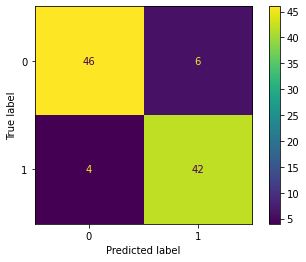

In [61]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_sub, y_train)

evaluate_clf(lda, X_test_sub, y_test)

## QDA

              precision    recall  f1-score   support

           0      0.891     0.942     0.916        52
           1      0.930     0.870     0.899        46

    accuracy                          0.908        98
   macro avg      0.911     0.906     0.907        98
weighted avg      0.909     0.908     0.908        98



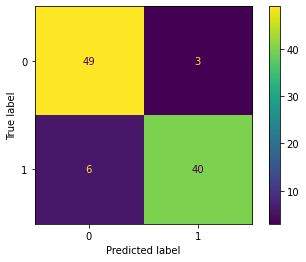

In [63]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_sub, y_train)

evaluate_clf(qda, X_test_sub, y_test)


## Logistic Regression

In [64]:
log_model = sm.Logit(y_train, sm.add_constant(X_train_sub)).fit()

log_model.summary()

Optimization terminated successfully.
         Current function value: 0.262021
         Iterations 9


C:\Users\amrsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  294
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Jun 2022   Pseudo R-squ.:                  0.6219
Time:                        21:11:55   Log-Likelihood:                -77.034
converged:                       True   LL-Null:                       -203.72
Covariance Type:            nonrobust   LLR p-value:                 1.217e-53
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.3722      2.038      6.069      0.000       8.377      16.368
cylinders        0.1821      0.395      0.461      0.645      -0.592       0.957
displacement    -0.0143      0.009     -1.536      0.124      -0.032       0.004
horsepower      -0.0467      0.016     -2.855      0.004      -0.079      -0.015
weight          -0.0023      0.001     -2.779      0.005      -0.004      -0.001
================================================================================
"""

              precision    recall  f1-score   support

           0      0.873     0.923     0.897        52
           1      0.907     0.848     0.876        46

    accuracy                          0.888        98
   macro avg      0.890     0.885     0.887        98
weighted avg      0.889     0.888     0.887        98



C:\Users\amrsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


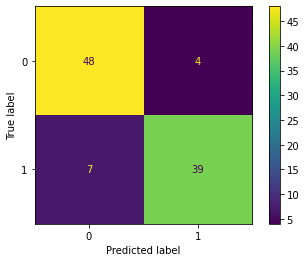

In [73]:
evaluate_clf(log_model, sm.add_constant(X_test_sub), y_test, round=True)